In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='darkgrid', font_scale=1.5)  #设置背景
plt.rcParams['font.sans-serif'] =['SimHei'] #设置字体，支持中文
plt.rcParams['axes.unicode_minus'] =False


# 1、数据查看

In [2]:
import os

In [3]:
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype = str)

In [4]:
data_user.shape

(12256906, 6)

In [5]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB


In [6]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category           time
0  98047837  232431562             1          NaN          4245  2014-12-06 02
1  97726136  383583590             1          NaN          5894  2014-12-09 20
2  98607707   64749712             1          NaN          2883  2014-12-18 11
3  98662432  320593836             1      96nn52n          6562  2014-12-06 10
4  98145908  290208520             1          NaN         13926  2014-12-16 21

In [7]:
data_user.describe()

user_id    item_id behavior_type user_geohash item_category  \
count   12256906   12256906      12256906      3922082      12256906   
unique     10000    2876947             4       575458          8916   
top     36233277  112921337             1      94ek6ke          1863   
freq       31030       1445      11550581         1052        393247   

                 time  
count        12256906  
unique            744  
top     2014-12-11 22  
freq            54797

In [8]:
#把日期和小时分别取出来，从日期，小时两个角度分析购物行为
data_user['date'] = data_user['time'].str[0:10]
data_user['hour'] = data_user['time'].str[11:]  #如果发生溢出就分开执行

#类型转换
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['time']= pd.to_datetime(data_user['time'])
data_user['hour'] = data_user['hour'].astype(int) #可以改为np.int8

In [9]:
#对数据进行一下排序
data_user.sort_values(by ='time',ascending=True,inplace = True)

In [10]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category  \
1505077    73462715  378485233             1          NaN          9130   
8686537    36090137  236748115             1          NaN         10523   
4035788    40459733  155218177             1          NaN          8561   
10113411     814199  149808524             1          NaN          9053   
2936757   113309982    5730861             1          NaN          3783   

               time       date  hour  
1505077  2014-11-18 2014-11-18     0  
8686537  2014-11-18 2014-11-18     0  
4035788  2014-11-18 2014-11-18     0  
10113411 2014-11-18 2014-11-18     0  
2936757  2014-11-18 2014-11-18     0

In [11]:
data_user.tail()

user_id    item_id behavior_type user_geohash item_category  \
5241608   132653097  119946062             2          NaN          6054   
10296029  130082553  296196819             1          NaN         11532   
8527264    43592945  350594832             1      9rhhgph          9541   
6263497    12833799  186993938             1      954g37v          3798   
9200479    77522552   69292191             1          NaN           889   

                        time       date  hour  
5241608  2014-12-18 23:00:00 2014-12-18    23  
10296029 2014-12-18 23:00:00 2014-12-18    23  
8527264  2014-12-18 23:00:00 2014-12-18    23  
6263497  2014-12-18 23:00:00 2014-12-18    23  
9200479  2014-12-18 23:00:00 2014-12-18    23

In [12]:
#drop=True，代表丢弃原有索引，按位置重新生成索引，在原有df生效
data_user.reset_index(drop =True,inplace =True)

In [13]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category       time  \
0   73462715  378485233             1          NaN          9130 2014-11-18   
1   36090137  236748115             1          NaN         10523 2014-11-18   
2   40459733  155218177             1          NaN          8561 2014-11-18   
3     814199  149808524             1          NaN          9053 2014-11-18   
4  113309982    5730861             1          NaN          3783 2014-11-18   

        date  hour  
0 2014-11-18     0  
1 2014-11-18     0  
2 2014-11-18     0  
3 2014-11-18     0  
4 2014-11-18     0

In [14]:
data_user.tail()

user_id    item_id behavior_type user_geohash item_category  \
12256901  132653097  119946062             2          NaN          6054   
12256902  130082553  296196819             1          NaN         11532   
12256903   43592945  350594832             1      9rhhgph          9541   
12256904   12833799  186993938             1      954g37v          3798   
12256905   77522552   69292191             1          NaN           889   

                        time       date  hour  
12256901 2014-12-18 23:00:00 2014-12-18    23  
12256902 2014-12-18 23:00:00 2014-12-18    23  
12256903 2014-12-18 23:00:00 2014-12-18    23  
12256904 2014-12-18 23:00:00 2014-12-18    23  
12256905 2014-12-18 23:00:00 2014-12-18    23

### 日ARPU--按照每一天的方式去计算ARPU

In [15]:
data_user['operation']=1  #增加一列方便操作的作用
data_user_buy2 = data_user.groupby(['date' , 'user_id' , 'behavior_type'])['operation'].count()


In [16]:
data_user_buy2.head(30)

date        user_id    behavior_type
2014-11-18  100001878  1                127
                       3                  8
                       4                  1
            100014060  1                 23
                       3                  2
                       4                  2
            100024529  1                185
                       3                 12
                       4                  6
            100027681  1                141
                       3                  1
                       4                  3
            100042340  1                 33
            10004287   1                115
                       2                  5
                       3                  4
                       4                  2
            100067745  1                 34
            100078685  1                109
                       3                  3
            100086267  1                104
                       3               

In [17]:
data_user_buy2.reset_index().rename(columns ={'operation':'total'})

date    user_id behavior_type  total
0      2014-11-18  100001878             1    127
1      2014-11-18  100001878             3      8
2      2014-11-18  100001878             4      1
3      2014-11-18  100014060             1     23
4      2014-11-18  100014060             3      2
...           ...        ...           ...    ...
375435 2014-12-18    9996155             3      2
375436 2014-12-18   99963140             1     78
375437 2014-12-18   99963140             3      1
375438 2014-12-18   99968428             1      4
375439 2014-12-18   99989881             1     11

[375440 rows x 4 columns]

In [18]:
#上面是逐步解析，这里整体编写，二合1
data_user_buy2 = data_user.groupby(['date' , 'user_id' , 'behavior_type'])['operation'].\
    count().reset_index().rename(columns ={'operation':'total'})

In [19]:
data_user_buy2.head(30)

date    user_id behavior_type  total
0  2014-11-18  100001878             1    127
1  2014-11-18  100001878             3      8
2  2014-11-18  100001878             4      1
3  2014-11-18  100014060             1     23
4  2014-11-18  100014060             3      2
5  2014-11-18  100014060             4      2
6  2014-11-18  100024529             1    185
7  2014-11-18  100024529             3     12
8  2014-11-18  100024529             4      6
9  2014-11-18  100027681             1    141
10 2014-11-18  100027681             3      1
11 2014-11-18  100027681             4      3
12 2014-11-18  100042340             1     33
13 2014-11-18   10004287             1    115
14 2014-11-18   10004287             2      5
15 2014-11-18   10004287             3      4
16 2014-11-18   10004287             4      2
17 2014-11-18  100067745             1     34
18 2014-11-18  100078685             1    109
19 2014-11-18  100078685             3      3
20 2014-11-18  100086267             1    104
21 2014-11-18  100086267             3      8
22 2014-11-18  100097997             1     30
23 2014-11-18  100109755             1    120
24 2014-11-18  100109755             2      4
25 2014-11-18  100112744             1     21
26 2014-11-18  100112744             2      1
27 2014-11-18  100128093             1     13
28 2014-11-18  100128093             4      2
29 2014-11-18  100159569             1      2

In [20]:
#4代表支付
#每天的活跃用户的平均消费次数
data_user_buy2.groupby('date').apply(lambda x: x[x['behavior_type'] =='4' ].total.sum()/len(x.user_id.unique()))

date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

In [21]:
#.total代表取total那列,通过点去获取对应列的编写效率更高
data_user_buy2.total

0         127
1           8
2           1
3          23
4           2
         ... 
375435      2
375436     78
375437      1
375438      4
375439     11
Name: total, Length: 375440, dtype: int64

In [22]:
data_user_buy2_plot=data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.sum()/len(x.user_id.unique()))

In [23]:
data_user_buy2_plot.index

DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21',
               '2014-11-22', '2014-11-23', '2014-11-24', '2014-11-25',
               '2014-11-26', '2014-11-27', '2014-11-28', '2014-11-29',
               '2014-11-30', '2014-12-01', '2014-12-02', '2014-12-03',
               '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13', '2014-12-14', '2014-12-15',
               '2014-12-16', '2014-12-17', '2014-12-18'],
              dtype='datetime64[ns]', name='date', freq=None)

In [24]:
#data_user_buy2_plot 画折线图
plt.figure(figsize=(20,8),dpi=80)
plt.plot(data_user_buy2_plot.index,data_user_buy2_plot.values)
plt.xticks(data_user_buy2_plot.index[::3], data_user_buy2_plot.index[::3], rotation =45)
plt.show()

# 日ARPPU

In [25]:
#本月总用户数
data_user_buy2.groupby('user_id').count().count()

date             10000
behavior_type    10000
total            10000
dtype: int64

In [26]:
#本月发生支付行为的用户总数
data_user_buy2[data_user_buy2['behavior_type'] =='4'].groupby('user_id').count().count()

date             8886
behavior_type    8886
total            8886
dtype: int64

In [27]:
#日ARPPU
data_user_buy2.groupby('date').apply(lambda x: x[x['behavior_type'] =='4' ].total.sum()/x[x['behavior_type'] =='4' ].total.count())

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
dtype: float64

# 每日付费率
### 每天购物人数占总人数的比例，这里是count，不是sum

In [28]:
#付费率
pay_rate = data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.count()/len(x.user_id.unique()))

In [29]:
pay_rate

date
2014-11-18    0.242630
2014-11-19    0.235358
2014-11-20    0.235591
2014-11-21    0.211918
2014-11-22    0.228059
2014-11-23    0.225326
2014-11-24    0.233994
2014-11-25    0.235711
2014-11-26    0.233915
2014-11-27    0.240132
2014-11-28    0.232994
2014-11-29    0.221240
2014-11-30    0.240477
2014-12-01    0.253209
2014-12-02    0.241985
2014-12-03    0.257707
2014-12-04    0.242689
2014-12-05    0.234490
2014-12-06    0.225466
2014-12-07    0.218468
2014-12-08    0.236289
2014-12-09    0.217636
2014-12-10    0.216777
2014-12-11    0.210183
2014-12-12    0.504793
2014-12-13    0.228601
2014-12-14    0.225855
2014-12-15    0.239723
2014-12-16    0.245207
2014-12-17    0.236339
2014-12-18    0.235795
dtype: float64

In [30]:
pay_rate.mean()

0.24156630970869047

In [31]:
pay_rate[pay_rate != pay_rate['2014-12-12']].mean()  #去掉双十二的影响

0.23279209516184718

In [32]:
#可以看出平时只有23%的用户有消费行为，但是双12有50%的用户有消费行为
plt.figure(figsize=(20,8),dpi=80)
pay_rate.plot()
plt.xticks(pay_rate.index[::3], pay_rate.index[::3], rotation =45)
plt.show()

# 购物是发生在什么时间，这里是按照小时来分析

In [33]:
# 每天的每小时内的购买次数
data_user_buy3 = data_user[data_user['behavior_type'] == '4'].groupby([ 'date', 'hour'])['operation'].sum()

In [34]:
data_user_buy3

date        hour
2014-11-18  0       115
            1        35
            2        29
            3        13
            4         6
                   ... 
2014-12-18  19      169
            20      249
            21      259
            22      248
            23      227
Name: operation, Length: 744, dtype: int64

In [35]:
data_user_buy4=data_user_buy3['2014-11-18']

In [36]:
data_user_buy4

hour
0     115
1      35
2      29
3      13
4       6
5      14
6      24
7      50
8     124
9     185
10    215
11    250
12    221
13    310
14    207
15    196
16    206
17    142
18    170
19    189
20    221
21    292
22    305
23    211
Name: operation, dtype: int64

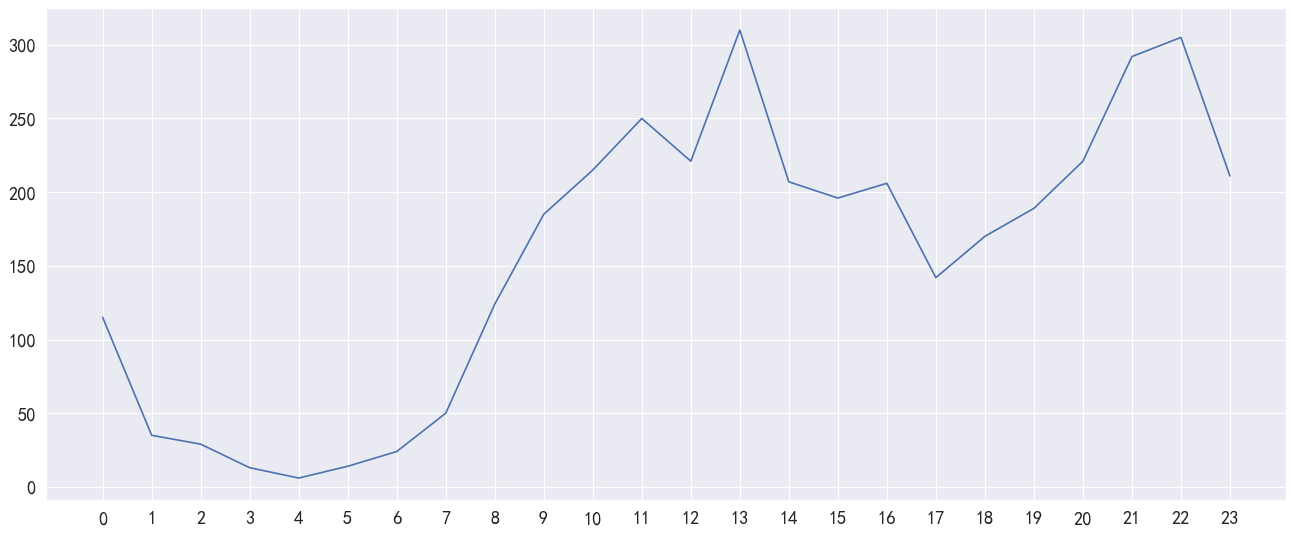

In [37]:
plt.figure(figsize=(20,8),dpi=80)
plt.xticks(range(0,24))
plt.plot(data_user_buy4.index,data_user_buy4.values)
plt.show()

In [38]:
# 每小时的购买次数
data_user_buy3 = data_user[data_user['behavior_type'] == '4'].groupby(['hour'])['operation'].sum()
data_user_buy3

hour
0     4845
1     1703
2      806
3      504
4      397
5      476
6     1023
7     1938
8     3586
9     5707
10    7317
11    7086
12    6956
13    7717
14    7207
15    7312
16    6930
17    5298
18    5140
19    6352
20    7872
21    8829
22    8845
23    6359
Name: operation, dtype: int64

In [39]:
plt.figure(figsize=(20,8),dpi=80)
plt.xticks(range(0,24))
plt.plot(data_user_buy3.index,data_user_buy3.values)
plt.show()

In [40]:
# 可以看出，30天内的情况和一天内的情况差不多，都是21、22点达到高峰

# 复购行为分析
### 30天内，有两天及以上购买，则算复购

In [41]:
#辅助理解,270407是行索引号
for i in data_user[data_user.behavior_type =='4' ].groupby('user_id')['date']:
    print(f"分组第一个用户的id：\n{i[0]}")
    print("-"*50)
    print(f"该用户这个月的购买情况：\n{i[1]}")
    break

分组第一个用户的id：
100001878
--------------------------------------------------
该用户这个月的购买情况：
270407     2014-11-18
2439076    2014-11-24
2439090    2014-11-24
2440428    2014-11-24
2660355    2014-11-25
2672617    2014-11-25
3075867    2014-11-26
3076142    2014-11-26
3178225    2014-11-26
3627084    2014-11-27
4041992    2014-11-29
4121098    2014-11-29
5844240    2014-12-03
5990081    2014-12-04
6034724    2014-12-04
6034730    2014-12-04
6034745    2014-12-04
7741727    2014-12-08
7763671    2014-12-08
7874796    2014-12-08
8537843    2014-12-10
8541997    2014-12-10
8545496    2014-12-10
9804567    2014-12-12
9822831    2014-12-12
9832820    2014-12-12
9835545    2014-12-12
10065248   2014-12-13
10515816   2014-12-14
10856624   2014-12-15
10873197   2014-12-15
11011329   2014-12-15
12011660   2014-12-18
12014976   2014-12-18
12249127   2014-12-18
12249379   2014-12-18
Name: date, dtype: datetime64[ns]


In [42]:
#用户当天购买多次，只算一次，使用len(x.unique())
#用户一个月内有多少天进行了购物
data_rebuy = data_user[data_user.behavior_type =='4' ].groupby('user_id')['date'].apply(lambda x: len(x.unique()))

In [43]:
data_rebuy  # 每个用户一个月总计有多少天购买（某天购买多次，只算一次）

user_id
100001878    15
100011562     3
100012968    11
100014060    12
100024529     9
             ..
99960313      5
9996155       3
99963140      8
99968428      9
99989881     13
Name: date, Length: 8886, dtype: int64

In [44]:
data_rebuy.describe()  # 每个用户平均5.5天有购买

count    8886.000000
mean        5.536912
std         4.021963
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        30.000000
Name: date, dtype: float64

In [45]:
#把购买次数大于等于2的用户，除以所有购物用户
data_rebuy[data_rebuy>=2].count()/data_rebuy.count()  #复购行为达到87%

0.8717083051991897

# 复购时间间隔

In [46]:
data_user.date.head()

0   2014-11-18
1   2014-11-18
2   2014-11-18
3   2014-11-18
4   2014-11-18
Name: date, dtype: datetime64[ns]

In [47]:
#pd支持[]去取某一列，也支持点取某一列
data_day_buy = data_user[data_user.behavior_type == '4'].groupby('user_id').date.\
    apply(lambda x:x)   # 这里的apply没什么用，只是为了展示分组

In [48]:
data_day_buy    # 一个层级索引的Series

user_id            
100001878  270407     2014-11-18
           2439076    2014-11-24
           2439090    2014-11-24
           2440428    2014-11-24
           2660355    2014-11-25
                         ...    
99989881   8203371    2014-12-09
           9248497    2014-12-12
           9249028    2014-12-12
           10601909   2014-12-14
           11085567   2014-12-15
Name: date, Length: 120205, dtype: datetime64[ns]

### 方法一

In [49]:
#groupby 的diff是拿每一行，减去前一行的值，分组内进行
data_day_buy = data_user[data_user.behavior_type == '4'].groupby('user_id').date.\
    apply(lambda x:x.diff(1))

### 方法二

In [50]:
# def calculate_time_diff(group):
#     group['time_diff'] = group['date'].diff()
#     return group
# data_day_buy = data_user[data_user.behavior_type == '4'].groupby('user_id').apply(calculate_time_diff)['time_diff']

In [51]:
data_day_buy.head(50)  # 是一个层级索引的Series

user_id            
100001878  270407        NaT
           2439076    6 days
           2439090    0 days
           2440428    0 days
           2660355    1 days
           2672617    0 days
           3075867    1 days
           3076142    0 days
           3178225    0 days
           3627084    1 days
           4041992    2 days
           4121098    0 days
           5844240    4 days
           5990081    1 days
           6034724    0 days
           6034730    0 days
           6034745    0 days
           7741727    4 days
           7763671    0 days
           7874796    0 days
           8537843    2 days
           8541997    0 days
           8545496    0 days
           9804567    2 days
           9822831    0 days
           9832820    0 days
           9835545    0 days
           10065248   1 days
           10515816   1 days
           10856624   1 days
           10873197   0 days
           11011329   0 days
           12011660   3 days
           12014976   0

In [52]:
data_day_buy = data_day_buy.dropna()

In [53]:
# timedelta64[ns] 是 pandas 和 NumPy 中用于表示时间差（即两个时间点之间的差异）的数据类型。
# 这种类型的对象通常由 pandas 的 Timestamp 对象相减得到，或者直接使用 pandas 或 NumPy 的时间差构造函数创建。
print(data_day_buy.dtype)

timedelta64[ns]


In [54]:
data_day_buy = data_day_buy.map(lambda x: x.days)  # x是timedelta64[ns]属性，.days返回时间差

In [55]:
data_day_buy = data_day_buy[data_day_buy >= 0]

In [56]:
data_day_buy.describe() # 所有用户的平均复购时间间隔是1.35天

count    111319.000000
mean          1.351692
std           2.934267
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          30.000000
Name: date, dtype: float64

In [57]:
# 每个用户的平均复购间隔
data_day_buy.groupby('user_id').mean()

user_id
100001878    0.857143
100011562    2.000000
100012968    2.000000
100014060    1.304348
100024529    1.120000
               ...   
99960313     2.428571
9996155      0.600000
99963140     1.444444
99968428     0.486486
99989881     1.687500
Name: date, Length: 8148, dtype: float64

# 漏斗分析


In [58]:
data_user_count = data_user.groupby('behavior_type').size()

In [59]:
data_user_count #四种行为的数量  点击、收藏、加入购物车和支付

behavior_type
1    11550581
2      242556
3      343564
4      120205
dtype: int64

In [60]:
# 所有行为都算pv
pv_all = data_user['user_id'].count()
print(pv_all)

12256906


In [61]:
# 总浏览量中有多少人没有去进行收藏，购物车，支付就离开了，这个就是流失率，94%只是看看就走了
data_user_count[0]/pv_all

0.9423733036706

In [62]:
# 有多少人点击了但是没有加入购物车
(data_user_count[0] - data_user_count[2])/data_user_count[0]

0.9702556953628566

In [63]:
# 点击多少次才会加入购物车的比例
data_user_count[0]/data_user_count[2]

33.61988159411347

In [64]:
# 并不是所有加入购物车的人都进行了收藏，有29%的人并没有收藏
(data_user_count[2] - data_user_count[1])/data_user_count[2]

0.29400053556251526

In [65]:
# 收藏后，有50%进行了支付
(data_user_count[1] - data_user_count[3])/data_user_count[1]

0.5044237207077953

In [87]:
# 加入购物车后，65%没有进行支付
(data_user_count[2] - data_user_count[3])/data_user_count[2]

0.6501234122317822

In [67]:
# 多少次点击才有一次支付
data_user_count[0]/data_user_count[3]

96.09068674347989

# RFM 分析

In [68]:
from datetime import datetime

In [69]:
data_user.time.max()

Timestamp('2014-12-18 23:00:00')

In [70]:
data_user.date.max()

Timestamp('2014-12-18 00:00:00')

In [71]:
data_user.tail()

user_id    item_id behavior_type user_geohash item_category  \
12256901  132653097  119946062             2          NaN          6054   
12256902  130082553  296196819             1          NaN         11532   
12256903   43592945  350594832             1      9rhhgph          9541   
12256904   12833799  186993938             1      954g37v          3798   
12256905   77522552   69292191             1          NaN           889   

                        time       date  hour  operation  
12256901 2014-12-18 23:00:00 2014-12-18    23          1  
12256902 2014-12-18 23:00:00 2014-12-18    23          1  
12256903 2014-12-18 23:00:00 2014-12-18    23          1  
12256904 2014-12-18 23:00:00 2014-12-18    23          1  
12256905 2014-12-18 23:00:00 2014-12-18    23          1

### R：每个用户的最近一次购买时间

In [72]:
# sort_values默认升序，然后取最后一个就是最近的
# 每个用户最新的购买日期和参考日期之间的时间间隔，即最后一次购买时间
recent_buy_time=data_user[data_user['behavior_type'] == '4'].groupby ('user_id')['date'].apply(lambda x:datetime(2014,12,18)- x.sort_values().iloc[-1])

In [73]:
recent_buy_time

user_id
100001878    0 days
100011562    2 days
100012968    0 days
100014060    0 days
100024529    2 days
              ...  
99960313     5 days
9996155     11 days
99963140     3 days
99968428     4 days
99989881     3 days
Name: date, Length: 8886, dtype: timedelta64[ns]

In [74]:
recent_buy_time=recent_buy_time.reset_index().rename(columns={'date':'recent'})
recent_buy_time.head()

user_id recent
0  100001878 0 days
1  100011562 2 days
2  100012968 0 days
3  100014060 0 days
4  100024529 2 days

In [75]:
# 去掉days
recent_buy_time['recent']=recent_buy_time.recent.apply(lambda x: x.days)
recent_buy_time

user_id  recent
0     100001878       0
1     100011562       2
2     100012968       0
3     100014060       0
4     100024529       2
...         ...     ...
8881   99960313       5
8882    9996155      11
8883   99963140       3
8884   99968428       4
8885   99989881       3

[8886 rows x 2 columns]

In [76]:
recent_buy_time.dtypes

user_id    object
recent      int64
dtype: object

In [77]:
# 用户的平均最近购买时间为5.8天前
recent_buy_time.describe()

recent
count  8886.000000
mean      5.811839
std       6.678478
min       0.000000
25%       1.000000
50%       4.000000
75%       7.000000
max      30.000000

### F：每个用户在这个月有多少天购买

In [78]:
#count和nunique的区别,count是计算一个月总的购物次数，nunique是计算唯一值的个数（有多少天购物）
buy_freq = data_user[data_user.behavior_type =='4'].groupby('user_id').date.nunique()

buy_freq

user_id
100001878    15
100011562     3
100012968    11
100014060    12
100024529     9
             ..
99960313      5
9996155       3
99963140      8
99968428      9
99989881     13
Name: date, Length: 8886, dtype: int64

In [79]:
buy_freq=buy_freq.reset_index().rename(columns={'date':'freq'})
buy_freq

user_id  freq
0     100001878    15
1     100011562     3
2     100012968    11
3     100014060    12
4     100024529     9
...         ...   ...
8881   99960313     5
8882    9996155     3
8883   99963140     8
8884   99968428     9
8885   99989881    13

[8886 rows x 2 columns]

In [80]:
rfm= pd.merge (recent_buy_time, buy_freq,left_on ='user_id' ,right_on ='user_id')

In [81]:
rfm

user_id  recent  freq
0     100001878       0    15
1     100011562       2     3
2     100012968       0    11
3     100014060       0    12
4     100024529       2     9
...         ...     ...   ...
8881   99960313       5     5
8882    9996155      11     3
8883   99963140       3     8
8884   99968428       4     9
8885   99989881       3    13

[8886 rows x 3 columns]

In [82]:
rfm['recent_value'] = pd.qcut(rfm.recent,2,labels=['2','1']) # qcut就是自动划分，2是分成两组

In [83]:
rfm['freq_value'] = pd.qcut(rfm.freq,2,labels=['1','2'])

In [84]:
rfm['rfm'] = rfm['recent_value'].str.cat(rfm['freq_value'])

In [85]:
rfm.head(100)  #22是最佳

user_id  recent  freq recent_value freq_value rfm
0   100001878       0    15            2          2  22
1   100011562       2     3            2          1  21
2   100012968       0    11            2          2  22
3   100014060       0    12            2          2  22
4   100024529       2     9            2          2  22
..        ...     ...   ...          ...        ...  ..
95  101050024       3    11            2          2  22
96  101061002       1    11            2          2  22
97  101120745       4     7            2          2  22
98  101122114       6     6            1          2  12
99  101150402       6     8            1          2  12

[100 rows x 6 columns]

In [86]:
rfm[rfm['rfm']=='11']

user_id  recent  freq recent_value freq_value rfm
7     100039408      29     1            1          1  11
9      10004287      18     3            1          1  11
13    100090063       6     2            1          1  11
15    100109755       5     5            1          1  11
18    100121842       6     2            1          1  11
...         ...     ...   ...          ...        ...  ..
8865   99775965       6     2            1          1  11
8866   99781075      18     2            1          1  11
8876   99856680       6     2            1          1  11
8881   99960313       5     5            1          1  11
8882    9996155      11     3            1          1  11

[3195 rows x 6 columns]